In [2]:
# import dolfin
# import mshr
from dolfin import *
from mshr import *
import dolfin.common.plotting as fenicsplot
import numpy as np
from matplotlib import pyplot as plt

# simple case
$$u \times B = f$$

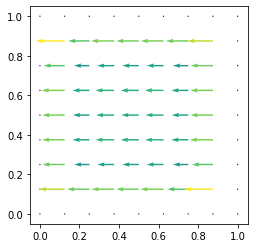

In [3]:
# mesh and spaces
res = 8
mesh = UnitSquareMesh(res, res)
# mesh = UnitCubeMesh(32, 32, 32)
V = VectorFunctionSpace(mesh, 'Lagrange', 1)
u = TrialFunction(V)
v = TestFunction(V)

# BCs
u_D = Constant((0,0))
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

# equations
f = Constant((0.0,0.1))
B = Constant((0,0,1))
# 2D cross product
uxB = as_vector(( u[1]*B[2], -u[0]*B[2] ))
a = dot(uxB,v)*dx
# a = inner(grad(u),grad(v))*dx
L = inner(f,v)
L = L*dx
u = Function(V)
solve (a==L, u, bc)

# plot
# plot(mesh)
# uvec = np.array(u.vector())
# uvec2D = np.reshape(uvec, (-1, int(np.sqrt(len(uvec)))))
plot(u)
plt.show()

# time dependence
$$
\dot u + u \times B = f
$$
$$
u^{n+1} = u^{n} - \Delta t (u^n \times B) + \Delta t f
$$

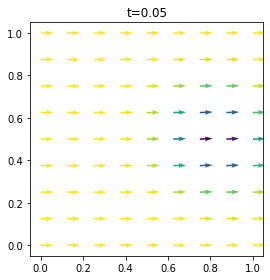

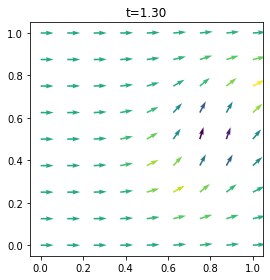

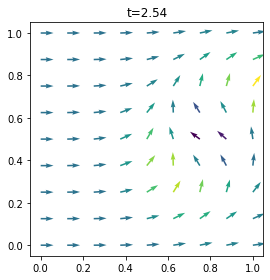

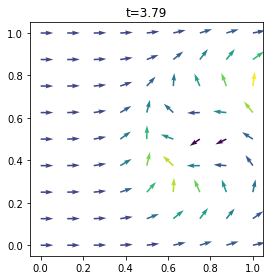

In [11]:
# Time-steps
T = 5.0
num_steps = 100
dt = T / num_steps

# mesh and spaces
res = 8
mesh = UnitSquareMesh(res,res)
V = VectorFunctionSpace(mesh, 'Lagrange', 1)
u = TrialFunction(V)
v = TestFunction(V)

# BC
u_D = Constant((10,0))
def boundary_D(x, on_boundary):
    tol = 1E-14
    if on_boundary and near(x[0], 0, tol):
        return True
    else: return False
bc = DirichletBC(V, u_D, boundary_D)

# equations
u_n = interpolate(u_D, V)
f = Constant((0,0.0001))
# B = Constant((0,0,1))
B = Expression(("0","0","exp(-10*(pow((x[0]-0.8),2)+pow((x[1]-0.5),2)))"),degree=1)
g = Expression('0', degree=1)
uxB = as_vector(( u[1]*B[2], -u[0]*B[2] ))
F = inner(u,v)*dx - inner(u_n + dt*f,v)*dx + dt*dot(uxB,v)*dx 
a, L = lhs(F), rhs(F) #- g*v*ds 

# file
# file_u = File("plots/u.pvd")

# time loop
u = Function(V)
t = 0
fignr=1
for n in range(num_steps):
    t += dt
    u_D.t = t
    
    solve(a == L, u, bc)
    
    if n%(num_steps/4)==0:
        plt.figure()
        plot(u)
        plt.title("t="+str(t)[:4])
        plt.tight_layout()
#         plt.savefig("plots/plot_NS_"+str(fignr)+".pdf")
        fignr+=1

#     file_u << u
          
    # Update previous solution
    u_n.assign(u)

# time dependence with diffusive term
$$
\dot u + u \times B + \Delta u = f
$$
$$
u^{n+1} = u^{n} - \Delta t (u^n \times B) + \Delta t \Delta u^n + \Delta t f
$$

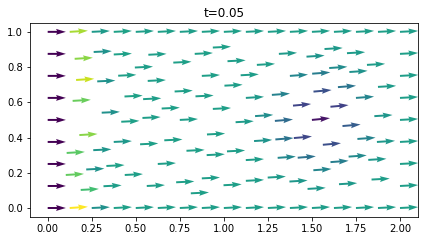

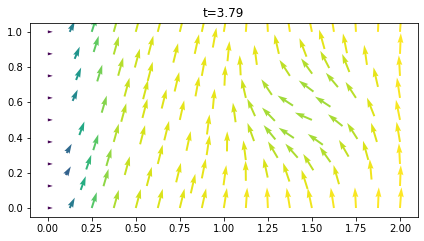

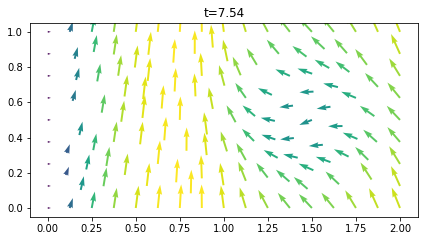

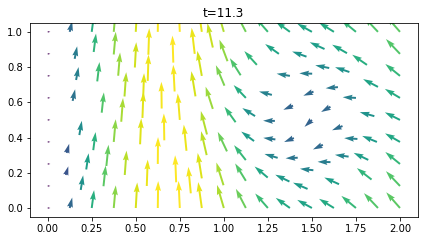

In [28]:
# Time-steps
T = 15.0
num_steps = 300
dt = T / num_steps

# mesh and spaces

channel = Rectangle(Point(0, 0), Point(2, 1))
# mesh = generate_mesh(channel, 10)
# V = VectorFunctionSpace(mesh, 'P', 2)
# Q = FunctionSpace(mesh, 'P', 1)

res = 10
mesh = generate_mesh(channel,res)
V = VectorFunctionSpace(mesh, 'Lagrange', 1)
u = TrialFunction(V)
v = TestFunction(V)

# BC
u_D = Constant((0.0001,0))
# def boundary_D(x, on_boundary):
#     tol = 1E-14
#     if on_boundary and near(x[0], 0, tol):
#         return True
#     else: return False
# bc = DirichletBC(V, u_D, boundary_D)

# BC in short
boundary_D = 'near(x[0], 0)'
bc = DirichletBC(V, u_D, boundary_D)

# equations
u_n = interpolate(u_D, V)
f = Constant((0,0.0001))
# B = Constant((0,0,1))
B = Expression(("0","0","exp(-10*(pow((x[0]-1.5),2)+pow((x[1]-0.5),2)))"),degree=1)
# g = Expression('0', degree=1)
uxB = as_vector(( u[1]*B[2], -u[0]*B[2] ))
F = inner(u,v)*dx - inner(u_n + dt*f,v)*dx + dt*dot(uxB,v)*dx +0.01*dt*inner(grad(u), grad(v))*dx
a, L = lhs(F), rhs(F) #- g*v*ds 

# file
# file_u = File("plots/u.pvd")

# time loop
u = Function(V)
t = 0
fignr=1
for n in range(num_steps):
    t += dt
    u_D.t = t
    
    solve(a == L, u, bc)
    
    if n%(num_steps/4)==0:
        plt.figure()
        plot(u)
        plt.title("t="+str(t)[:4])
        plt.tight_layout()
        plt.savefig("plots/2Ddiff_"+str(fignr)+".pdf")
        fignr+=1
        

#     file_u << u
          
    # Update previous solution
    u_n.assign(u)